In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/User/Desktop/Gondolin/dataset.csv', header=0)
print(df)

     Gender  Age  NS1  IgG  IgM        Area     AreaType HouseType District  \
0    Female   45    0    0    0      Mirpur  Undeveloped  Building    Dhaka   
1      Male   17    0    0    1  Chawkbazar    Developed  Building    Dhaka   
2    Female   29    0    0    0      Paltan  Undeveloped     Other    Dhaka   
3    Female   63    1    1    0   Motijheel    Developed     Other    Dhaka   
4      Male   22    0    0    0    Gendaria  Undeveloped  Building    Dhaka   
..      ...  ...  ...  ...  ...         ...          ...       ...      ...   
995  Female   16    1    1    0  New Market    Developed  Building    Dhaka   
996    Male   41    1    1    0      Paltan  Undeveloped     Other    Dhaka   
997    Male   45    0    0    1   Motijheel    Developed  Building    Dhaka   
998  Female   19    1    1    1      Paltan  Undeveloped  Building    Dhaka   
999  Female   28    0    0    1      Adabor    Developed  Building    Dhaka   

     Outcome  
0          0  
1          0  
2     

14
0
490


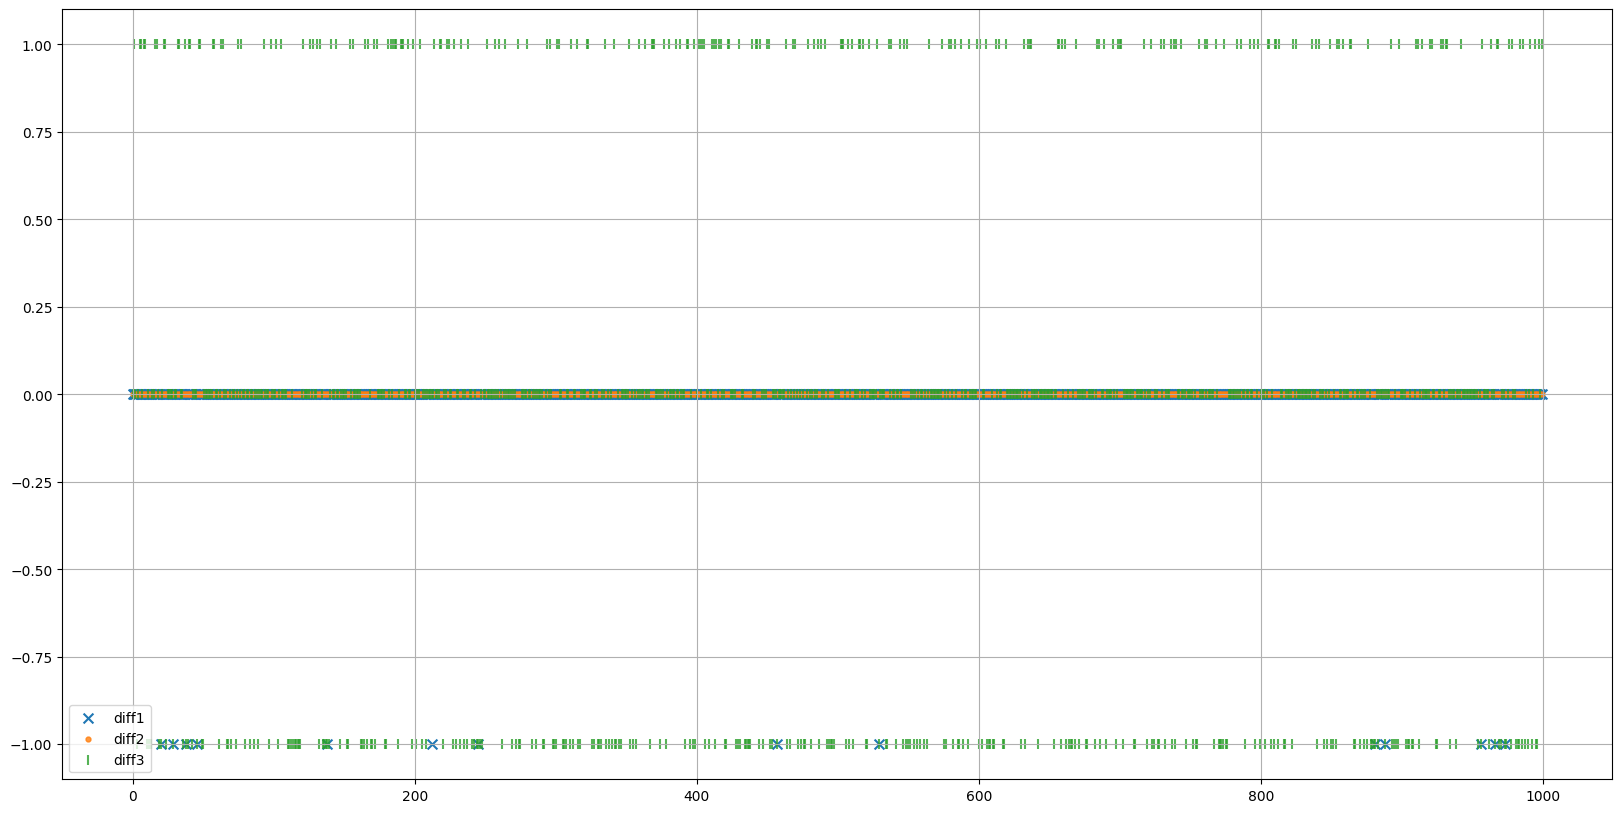

In [3]:
#raw correlation between parameters NS1, IgG ang IgM and the outcome

diff1 = df['NS1']-df['Outcome']
diff2 = df['IgG']-df['Outcome']
diff3 = df['IgM']-df['Outcome']
print(np.size(np.nonzero(diff1)))
print(np.size(np.nonzero(diff2)))
print(np.size(np.nonzero(diff3)))

ypoints = np.array(range(len(diff1)))

plt.figure(figsize=(20, 10)) # fig 1
plt.scatter(ypoints,diff1,s=50,marker='x')
plt.scatter(ypoints,diff2,s=50,alpha=0.8,marker='.')
plt.scatter(ypoints,diff3,s=50,alpha=0.8,marker='|')
plt.grid()
plt.legend(['diff1', 'diff2', 'diff3'])
plt.show()

In [4]:
Area_names = df['Area']
Area_names = list(set(Area_names))
Area_Types = df['AreaType']
Area_Types = list(set(Area_Types))

In [5]:
label_encoder = LabelEncoder()
df[['Area', 'AreaType', 'HouseType', 'District']] = df[['Area', 'AreaType', 'HouseType', 'District']].apply(LabelEncoder().fit_transform)
df_X = df[['Age','Area', 'AreaType', 'HouseType', 'District']]

In [6]:
areas = df['Area']
unique_areas = list(set(areas))
#print(unique_areas)

area_T = df['AreaType']
unique_areas_types = list(set(area_T))
#print(unique_areas_types)

In [7]:
Area_statistic = []

for A in unique_areas_types:
    div=df[(df['AreaType'] == A)]
    div_pos=div[(div['Outcome'] == 1)]
    div_neg=div[(div['Outcome'] == 0)]
    Area_statistic.append([A,len(div),np.mean(div['Age']),np.std(div['Age']),
                           len(div_neg),np.mean(div_neg['Age']),np.std(div_neg['Age']),
                           len(div_pos),np.mean(div_pos['Age']),np.std(div_pos['Age'])])

Area_type_statistic_df=pd.DataFrame(Area_statistic, columns=['AreaType','Cases','MeanAge','StdAge','CasesNeg','MeanAgeNeg','StdAgeNeg','CasesPos','MeanAgePos','StdAgePos']) 
Area_type_statistic_df['AreaType']=Area_Types
Area_type_statistic_df

,AreaType,Cases,MeanAge,StdAge,CasesNeg,MeanAgeNeg,StdAgeNeg,CasesPos,MeanAgePos,StdAgePos
0,Developed,501,35.626747,16.193269,244,36.512295,16.046930,257,34.785992,16.286495
1,Undeveloped,499,36.222445,16.718602,223,35.713004,16.819489,276,36.634058,16.625243


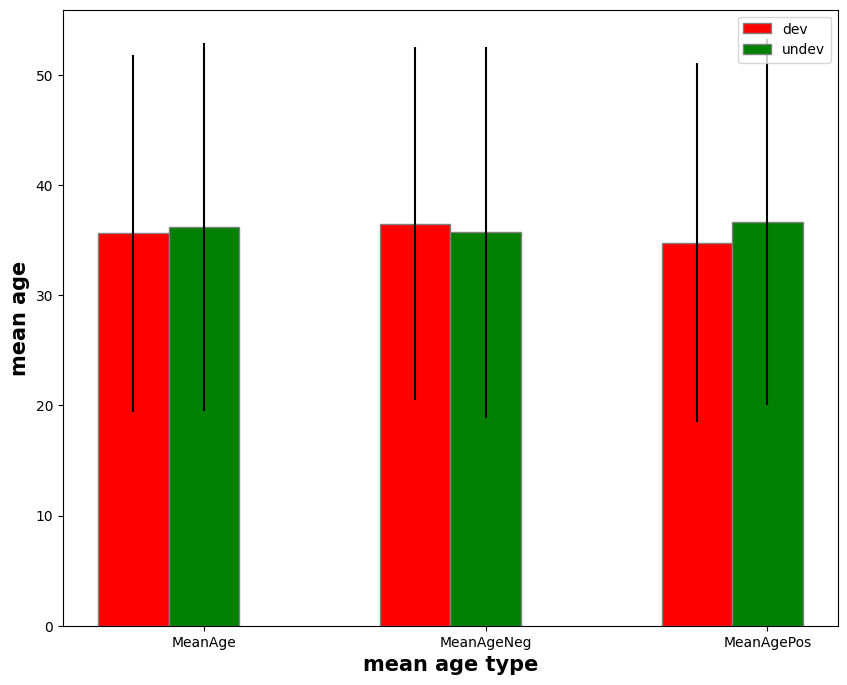

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(10, 8)) 

# set height of bar 
dev = Area_type_statistic_df.loc[[0], ['MeanAge','MeanAgeNeg','MeanAgePos']].to_numpy()[0]
undev = Area_type_statistic_df.loc[[1], ['MeanAge','MeanAgeNeg','MeanAgePos']].to_numpy()[0]
dev_std = Area_type_statistic_df.loc[[0], ['StdAge','StdAgeNeg','StdAgePos']].to_numpy()[0]
undev_std = Area_type_statistic_df.loc[[1], ['StdAge','StdAgeNeg','StdAgePos']].to_numpy()[0]

# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 

# Make the plot fig 2
plt.bar(br1, dev, color ='r', width = barWidth, 
        edgecolor ='grey', label ='dev', yerr=dev_std) 
plt.bar(br2, undev, color ='g', width = barWidth, 
        edgecolor ='grey', label ='undev', yerr=undev_std) 

# Adding Xticks 
plt.xlabel('mean age type', fontweight ='bold', fontsize = 15) 
plt.ylabel('mean age', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(dev))], 
        ['MeanAge','MeanAgeNeg','MeanAgePos'])

plt.legend()
plt.show() 


In [9]:
Area_statistic = []

for A in unique_areas:
    div=df[(df['Area'] == A)]
    div_pos=div[(div['Outcome'] == 1)]
    div_neg=div[(div['Outcome'] == 0)]
    Area_statistic.append([A,len(div),np.mean(div['Age']),np.std(div['Age']),
                           len(div_neg),np.mean(div_neg['Age']),np.std(div_neg['Age']),
                           len(div_pos),np.mean(div_pos['Age']),np.std(div_pos['Age'])])

Area_statistic_df=pd.DataFrame(Area_statistic, columns=['AreaType','Cases','MeanAge','StdAge','CasesNeg','MeanAgeNeg','StdAgeNeg','CasesPos','MeanAgePos','StdAgePos']) 
Area_statistic_df['AreaType']=Area_names
Area_statistic_df

,AreaType,Cases,MeanAge,StdAge,CasesNeg,MeanAgeNeg,StdAgeNeg,CasesPos,MeanAgePos,StdAgePos
0,Bosila,22,34.863636,13.369896,8,34.125000,10.821709,14,35.285714,14.611290
1,New Market,31,32.193548,15.325331,14,31.500000,15.136286,17,32.764706,15.455931
2,Shyampur,29,32.793103,18.025613,19,31.842105,17.705970,10,34.600000,18.483506
3,Sutrapur,34,34.352941,15.019365,10,33.100000,14.286007,24,34.875000,15.284285
4,Adabor,30,38.800000,16.448708,18,34.000000,15.758596,12,46.000000,14.747881
5,Lalbagh,24,38.541667,18.043880,13,41.230769,17.392102,11,35.363636,18.281997
6,Bangshal,20,35.000000,15.817712,8,30.000000,11.736695,12,38.333333,17.244967
7,Kafrul,22,37.772727,17.257230,11,34.363636,17.592730,11,41.181818,16.213452
8,Banasree,38,37.157895,17.229910,12,40.916667,15.223109,26,35.423077,17.815665
9,Sabujbagh,34,36.176471,16.846139,17,38.000000,17.977110,17,34.352941,15.419396


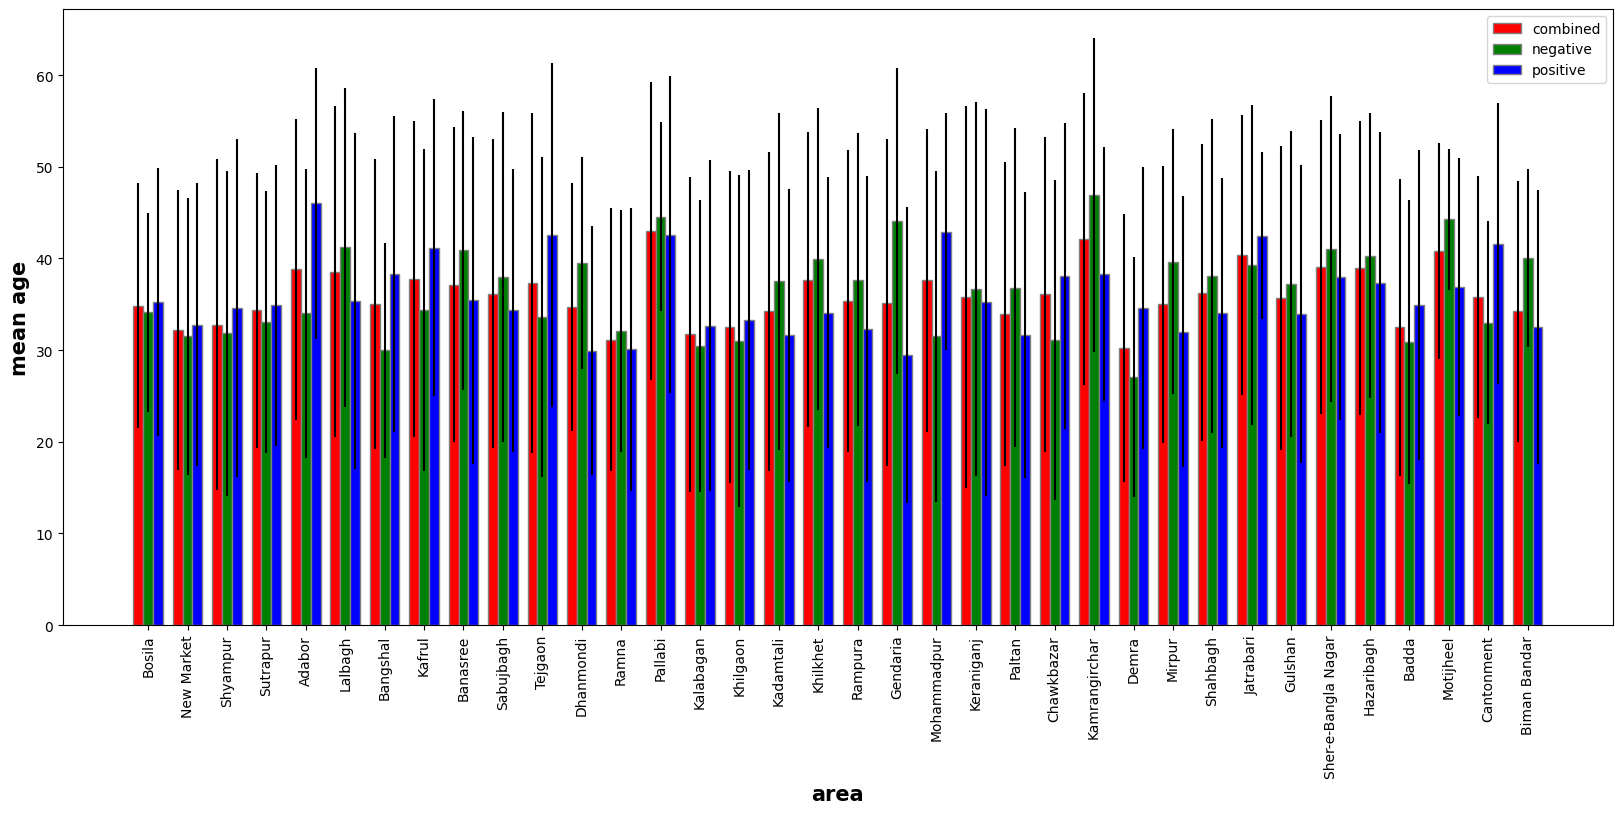

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8)) 

# set height of bar 
M_A = Area_statistic_df.loc[:, ['MeanAge']].to_numpy()[:,0]
M_A_N = Area_statistic_df.loc[:, ['MeanAgeNeg']].to_numpy()[:,0]
M_A_P = Area_statistic_df.loc[:, ['MeanAgePos']].to_numpy()[:,0]
S_A = Area_statistic_df.loc[:, ['StdAge']].to_numpy()[:,0]
S_A_N = Area_statistic_df.loc[:, ['StdAgeNeg']].to_numpy()[:,0]
S_A_P = Area_statistic_df.loc[:, ['StdAgePos']].to_numpy()[:,0]

# Set position of bar on X axis 
br1 = np.arange(36) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot fig 3
plt.bar(br1, M_A, color ='r', width = barWidth, 
        edgecolor ='grey', label ='combined', yerr=S_A) 
plt.bar(br2, M_A_N, color ='g', width = barWidth, 
        edgecolor ='grey', label ='negative', yerr=S_A_N) 
plt.bar(br3, M_A_P, color ='b', width = barWidth, 
        edgecolor ='grey', label ='positive', yerr=S_A_P) 

# Adding Xticks 
plt.xlabel('area', fontweight ='bold', fontsize = 15) 
plt.ylabel('mean age', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(M_A))], 
        Area_names, rotation=90)

plt.legend()
plt.show() 


In [11]:
X = df_X.values
y = df.values[:, 9]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
clf = DecisionTreeClassifier(max_depth=5) # classifier
clf = clf.fit(X_train,y_train) # classifier training
y_train_pred = clf.predict(X_train) # verification
print("Accuracy (train):",metrics.accuracy_score(y_train,y_train_pred))
y_test_pred = clf.predict(X_test)
print("Accuracy (test):",metrics.accuracy_score(y_test, y_test_pred))

Accuracy (train): 0.6271428571428571
Accuracy (test): 0.52


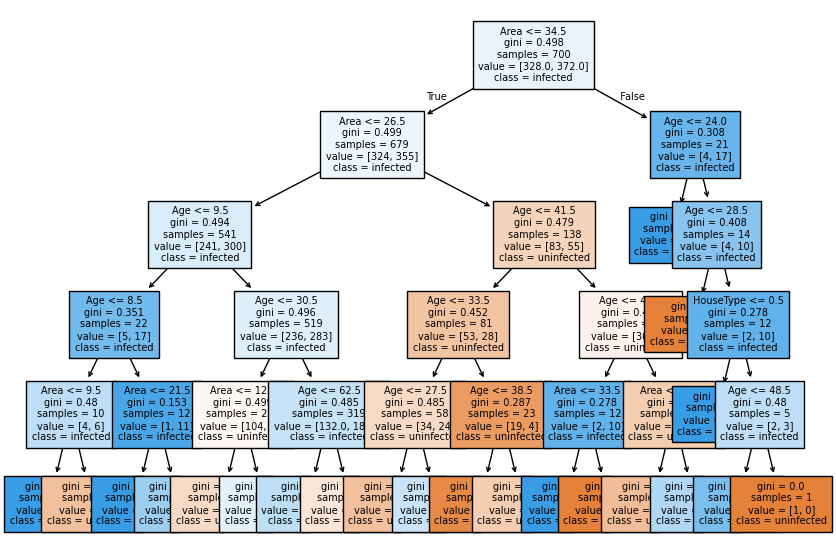

In [13]:
plt.figure(figsize=(10,7)) #fig 4
tree.plot_tree(clf, fontsize=7, filled=True,feature_names=df_X.columns, class_names=['uninfected','infected'])
#plt.savefig('DTiris.png')
plt.show()

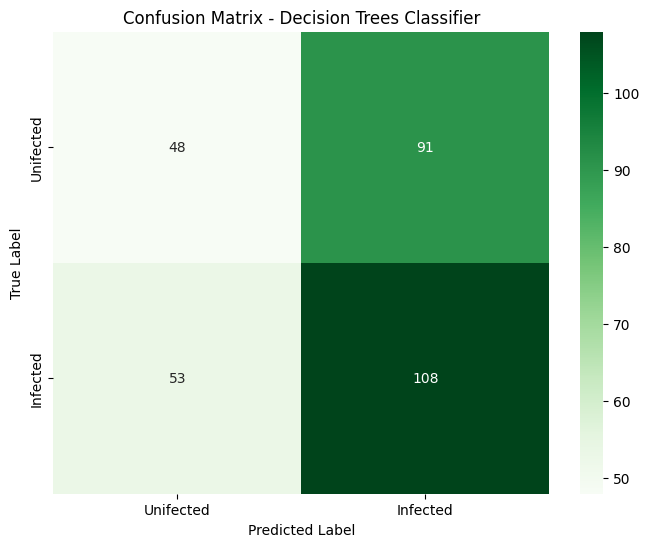

In [14]:
cm_rf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Unifected', 'Infected'], yticklabels=['Unifected', 'Infected']) #fig 5
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Trees Classifier')
plt.show()

In [15]:
clf = RandomForestClassifier(n_estimators=10, random_state=10)
clf = clf.fit(X_train,y_train) # training
y_test_pred = clf.predict(X_test) # prediction
print("Accuracy (test):",metrics.accuracy_score(y_test, y_test_pred))

Accuracy (test): 0.51


In [16]:
score = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
print("Mean AUC score: ",score.mean())
print("Std AUC score: ",score.std())

Mean AUC score:  0.5384059910363298
Std AUC score:  0.04633195710192549


Age          0.467471
Area         0.427701
AreaType     0.029799
HouseType    0.075029
District     0.000000
dtype: float64


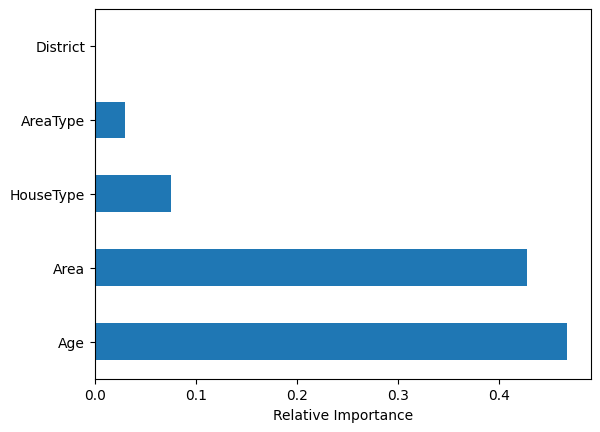

In [17]:
importances = pd.Series(clf.feature_importances_, index=df_X.keys())
print(importances)
importances.nlargest().plot(kind='barh')
plt.xlabel('Relative Importance')
plt.show() # fig 6

Accuracy (test): 0.54
Mean AUC score:  0.5307373573303245
Std AUC score:  0.0329132677329394
Age          0.474983
Area         0.421254
AreaType     0.033360
HouseType    0.070402
District     0.000000
dtype: float64


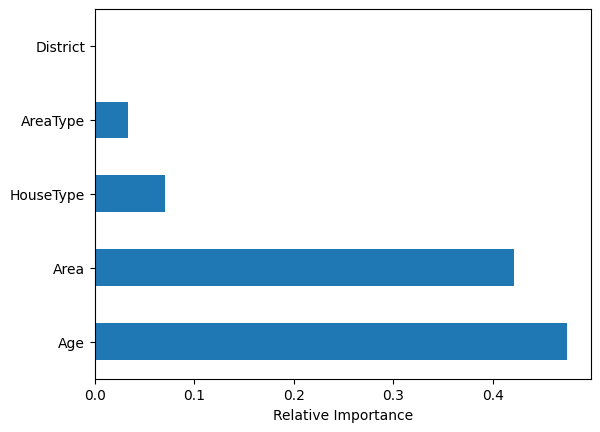

In [18]:
#analysis for different parameters

clf = RandomForestClassifier(n_estimators=15, random_state=10)
clf = clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
print("Accuracy (test):",metrics.accuracy_score(y_test, y_test_pred))

score = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print("Mean AUC score: ",score.mean())
print("Std AUC score: ",score.std())

importances = pd.Series(clf.feature_importances_, index=df_X.keys())
print(importances)
importances.nlargest().plot(kind='barh')
plt.xlabel('Relative Importance')
plt.show() # fig 7

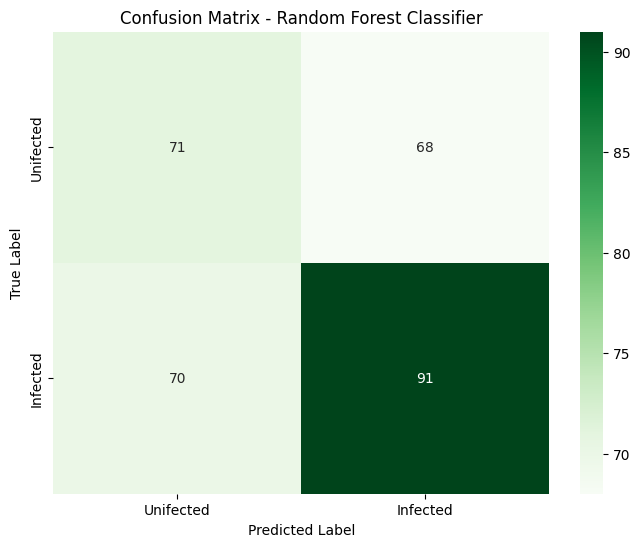

In [19]:
cm_rf = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Unifected', 'Infected'], yticklabels=['Unifected', 'Infected'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show() # fig 8

### Conclusions to the analysis performed:

Parameters Age and Area seem to have the biggest impact on classification for both decision trees and random forest calculations.

While taking into consideration only the space parameters and age, the general results, in terms of test accuracy, are quite low for both algorithms (up to 0.54 for random forest and 0.52 for decision trees).

Of course, if one makes the prediction with all off the data, the accuracy of most of the algorithms will equal 1, as value of parameter IgG has positive correlation with Outcome (which can be seen on first figure).

The parameter District is redundant, as all instances are from the same class.

At this point, there is not enough data to make precise prediction regarding the disease.

The analysis of mean age of people affected and uneffected based on their living situation was performed and presented on figures 2 and 3.

The number of cases for each area was calculated (general, positive and negative), however there are no significant differences between various areas.